# Classification

## Import

In [608]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

## Read and re-format

In [609]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../eda/ev-wiki-crawl-results.csv')  
print(df.shape)
df.head()

(1225, 3)


text             label  \
0  electric motive power started 1827 hungarian p...  electric vehicle   
1  first mass produced appeared america early 190...  electric vehicle   
2  20th century uk world largest user electric ro...  electric vehicle   
3  1900 28 percent car road electric ev popular e...  electric vehicle   
4  seldom marketed woman luxury car may stigma am...  electric vehicle   

   sentiment  
0    -0.7506  
1     0.9201  
2     0.7096  
3     0.9169  
4     0.9231

In [610]:
#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])

index = 0 : label = electric vehicle
index = 1 : label = gasoline vehicle
index = 2 : label = hybrid vehicle
number of text chunks =  1225
['electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847', 'first mass produced appeared america early 1900s 1902 studebaker automobile company entered automotive business though also entered gasoline vehi

## Vectorize the text data

In [611]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.0001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(1225, 8233) (1225,) (1225,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = -0.7506


## Partition Data

In [612]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
# Changed the output structure for better understanding

print("TRAINING SHAPES: \n", f"x_train:\n shape: {x_train.shape}\n type: {type(x_train)}\n", f"y_train:\n shape: {y_train.shape}\n type: {type(y_train)}\n")
print("TEST SHAPES: \n", f"x_test:\n shape: {x_test.shape}\n type: {type(x_test)}\n", f"y_test:\n shape: {y_test.shape}\n type: {type(y_test)}\n")

TRAINING SHAPES: 
 x_train:
 shape: (980, 8233)
 type: <class 'numpy.ndarray'>
 y_train:
 shape: (980,)
 type: <class 'numpy.ndarray'>

TEST SHAPES: 
 x_test:
 shape: (245, 8233)
 type: <class 'numpy.ndarray'>
 y_test:
 shape: (245,)
 type: <class 'numpy.ndarray'>



## Class distribution

In [613]:
import numpy as np

# Labels for the classes
labels = {0: 'electric vehicle', 1: 'gasoline vehicle', 2: 'hybrid vehicle'}

# y_train is a numpy array
unique_classes, counts = np.unique(y_train, return_counts=True)

# Get the proportions
proportions = counts / len(y_train)

# Print the results with labels
for unique_class, count in zip(unique_classes, counts):
    label = labels[unique_class]
    print(f"Number of points with target={label}: {count} ({count/len(y_train):.2f})")

# Retrieve the dominant class
dominant_class_index = np.argmax(counts)
dominant_class_label = labels[unique_classes[dominant_class_index]]
print("The dominant class is:", dominant_class_label)


Number of points with target=electric vehicle: 354 (0.36)
Number of points with target=gasoline vehicle: 353 (0.36)
Number of points with target=hybrid vehicle: 273 (0.28)
The dominant class is: electric vehicle


## Baseline model for comparison

In [614]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [615]:
from collections import Counter
import numpy as np
import random
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def generate_label_data(class_labels, weights, N=10000):
    # Generate random labels based on the given class weights
    y = random.choices(class_labels, weights=weights, k=N)
    print("-----GENERATING DATA-----")
    print("unique entries:", Counter(y).keys())
    print("count of labels:", Counter(y).values())
    print("probability of labels:", np.array(list(Counter(y).values())) / N)
    return y

def random_classifier(y_data, class_labels, weights):
    # Generate random predictions based on the distribution of class labels
    ypred = random.choices(class_labels, weights=weights, k=len(y_data))
    
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:", Counter(ypred).values())
    print("probability of prediction:", np.array(list(Counter(ypred).values())) / len(y_data))
    print("accuracy", accuracy_score(y_data, ypred))
    precision, recall, fscore, _ = precision_recall_fscore_support(y_data, ypred, average=None, labels=class_labels)
    print("precision, recall, fscore:", list(zip(precision, recall, fscore)))


In [616]:
# Example usage:
class_labels = ['electric vehicle', 'gasoline vehicle', 'hybrid vehicle']
weights = [0.36, 0.36, 0.28]

print("\nMULTI-CLASS: NON-UNIFORM LOAD")
y = generate_label_data(class_labels, weights, 10000)
random_classifier(y, class_labels, weights)


MULTI-CLASS: NON-UNIFORM LOAD
-----GENERATING DATA-----
unique entries: dict_keys(['gasoline vehicle', 'electric vehicle', 'hybrid vehicle'])
count of labels: dict_values([3595, 3640, 2765])
probability of labels: [0.3595 0.364  0.2765]
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([2801, 3555, 3644])
probability of prediction: [0.2801 0.3555 0.3644]
accuracy 0.3401
precision, recall, fscore: [(0.37019758507135014, 0.3706043956043956, 0.3704008786381109), (0.3592123769338959, 0.3552155771905424, 0.3572027972027972), (0.2766868975365941, 0.28028933092224234, 0.2784764642472153)]


In [617]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred, average=None)
    negative_precision = precision_score(y_data, y_pred, average=None)
    positive_recall = recall_score(y_data, y_pred, average=None)
    positive_precision = precision_score(y_data, y_pred, average=None)
    
    # Print metrics
    print(f"ACCURACY: {accuracy}")
    print(f"NEGATIVE RECALL (Y=0): {negative_recall}")
    print(f"NEGATIVE PRECISION (Y=0): {negative_precision}")
    print(f"POSITIVE RECALL (Y=1): {positive_recall}")
    print(f"POSITIVE PRECISION (Y=1): {positive_precision}")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    
    disp.plot()
    plt.show()

------TRAINING------
ACCURACY: 0.5479591836734694
NEGATIVE RECALL (Y=0): [0.64124294 0.67422096 0.26373626]
NEGATIVE PRECISION (Y=0): [0.50782998 0.65927978 0.41860465]
POSITIVE RECALL (Y=1): [0.64124294 0.67422096 0.26373626]
POSITIVE PRECISION (Y=1): [0.50782998 0.65927978 0.41860465]
[[227  70  57]
 [ 72 238  43]
 [148  53  72]]


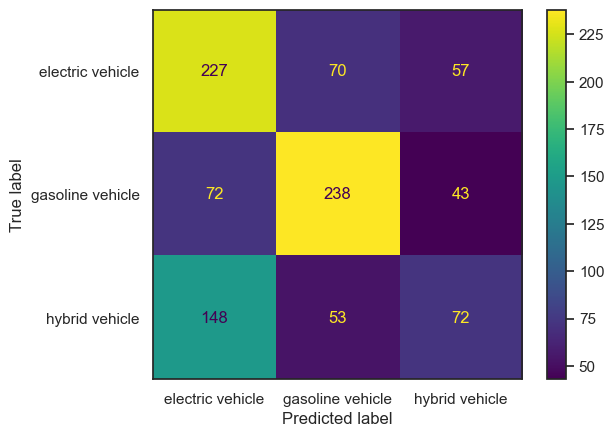

------TEST------
ACCURACY: 0.5142857142857142
NEGATIVE RECALL (Y=0): [0.62666667 0.67741935 0.20779221]
NEGATIVE PRECISION (Y=0): [0.40517241 0.68478261 0.43243243]
POSITIVE RECALL (Y=1): [0.62666667 0.67741935 0.20779221]
POSITIVE PRECISION (Y=1): [0.40517241 0.68478261 0.43243243]
[[47 15 13]
 [22 63  8]
 [47 14 16]]


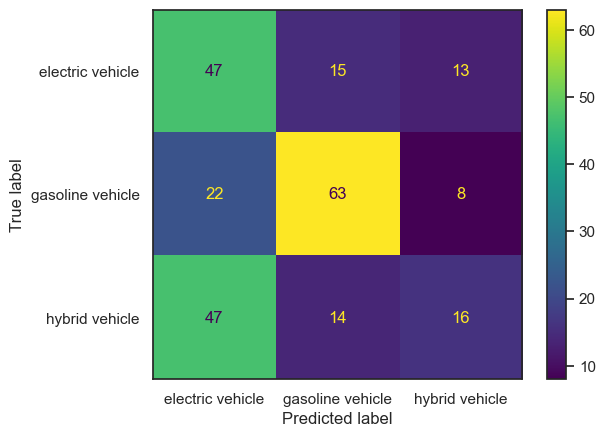

In [618]:
labels = ["electric vehicle", "gasoline vehicle", "hybrid vehicle"]

# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

In [619]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

def train_DTC_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    # SPLIT
    x_train = X[train_index]
    y_train = Y[train_index].flatten()

    x_test = X[test_index]
    y_test = Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = DecisionTreeClassifier()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train, y_train)
    time_train = time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if(i_print):
        print(acc_train, acc_test, time_train, time_eval)

    return (acc_train, acc_test, time_train, time_eval)

# TEST
print(type(x), type(y))
print(x.shape, y.shape)
(acc_train, acc_test, time_train, time_eval) = train_DTC_model(x, y, i_print=True)

NameError: name 'x' is not defined

In [ ]:
#UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

------TRAINING------
ACCURACY: 0.5479591836734694
NEGATIVE RECALL (Y=0): [0.64124294 0.67422096 0.26373626]
NEGATIVE PRECISION (Y=0): [0.50782998 0.65927978 0.41860465]
POSITIVE RECALL (Y=1): [0.64124294 0.67422096 0.26373626]
POSITIVE PRECISION (Y=1): [0.50782998 0.65927978 0.41860465]
[[227  70  57]
 [ 72 238  43]
 [148  53  72]]


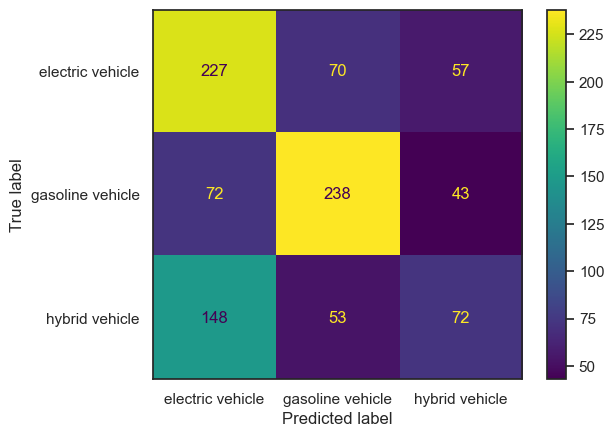

------TEST------
ACCURACY: 0.5142857142857142
NEGATIVE RECALL (Y=0): [0.62666667 0.67741935 0.20779221]
NEGATIVE PRECISION (Y=0): [0.40517241 0.68478261 0.43243243]
POSITIVE RECALL (Y=1): [0.62666667 0.67741935 0.20779221]
POSITIVE PRECISION (Y=1): [0.40517241 0.68478261 0.43243243]
[[47 15 13]
 [22 63  8]
 [47 14 16]]


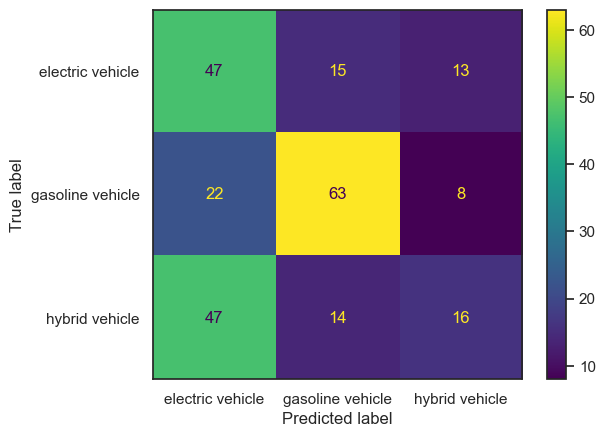

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_DTC_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

(250, 250)
[[0.         0.06661734 0.0877058  ... 0.05510388 0.07161149 0.14634235]
 [0.06661734 0.         0.         ... 0.04241898 0.10336228 0.02414023]
 [0.0877058  0.         0.         ... 0.10471348 0.06123724 0.09534626]
 ...
 [0.05510388 0.04241898 0.10471348 ... 0.         0.0854982  0.07987231]
 [0.07161149 0.10336228 0.06123724 ... 0.0854982  0.         0.09731237]
 [0.14634235 0.02414023 0.09534626 ... 0.07987231 0.09731237 0.        ]]


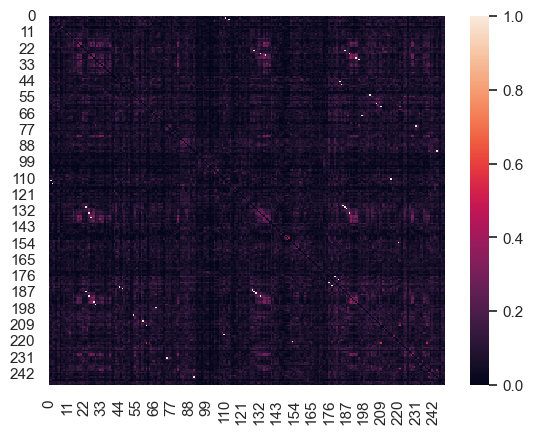

In [ ]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

[0.02668296 0.01480364 0.01259585 0.01007728 0.00935501 0.00881098
 0.00829497 0.0077585  0.0067137  0.00627816]
[43.67336893 32.5299975  30.00636873 26.83930993 25.85960328 25.09641805
 24.35045766 23.54987992 21.90688661 21.184393  ]


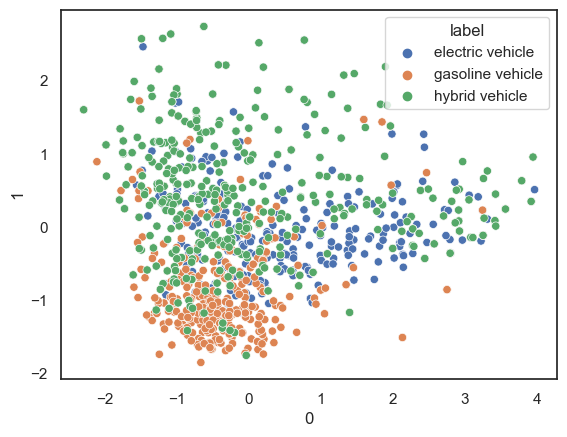

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


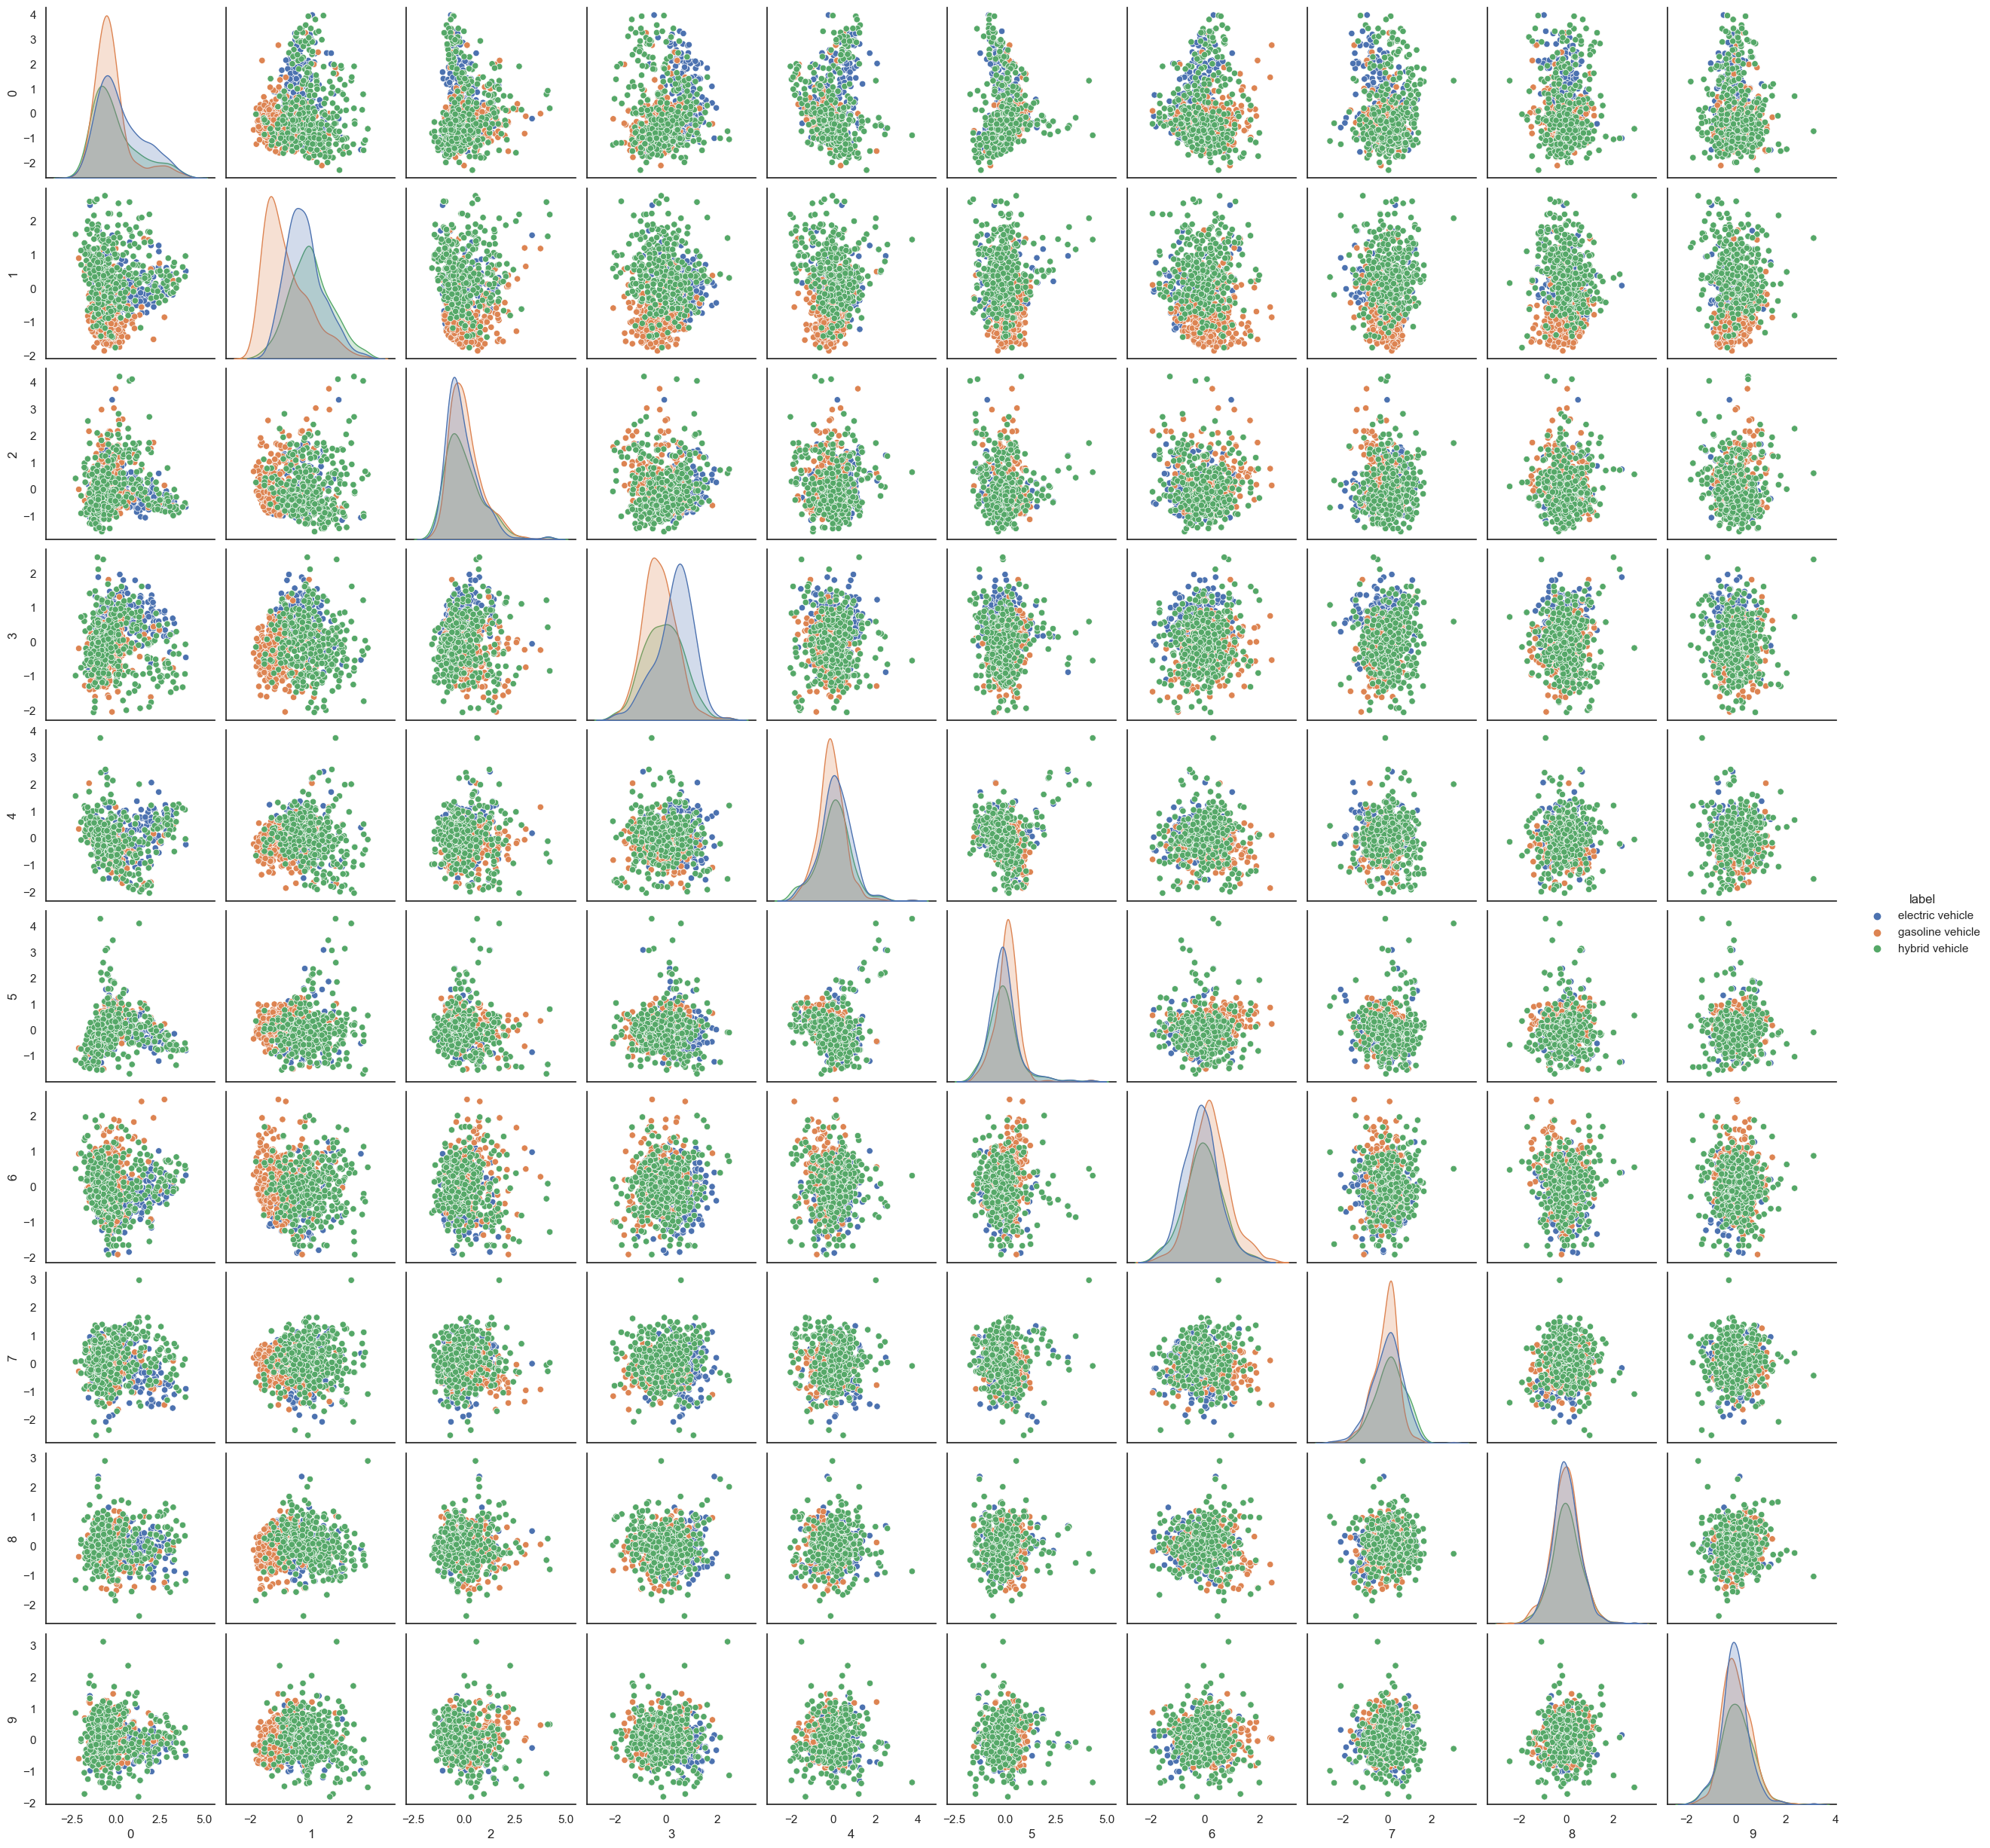

In [ ]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

In [ ]:
save_results(output_dir+"/partial_grid_search")
plot_results(output_dir+"/partial_grid_search")

In [ ]:
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

KeyError: "['target_column'] not found in axis"

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_DTC_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

In [ ]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

In [ ]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=200)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 0.7918367346938775
NEGATIVE RECALL (Y=0): [1.         0.82152975 0.48351648]
NEGATIVE PRECISION (Y=0): [0.67946257 0.88685015 1.        ]
POSITIVE RECALL (Y=1): [1.         0.82152975 0.48351648]
POSITIVE PRECISION (Y=1): [0.67946257 0.88685015 1.        ]
[[354   0   0]
 [ 63 290   0]
 [104  37 132]]


------TEST------
ACCURACY: 0.40816326530612246
NEGATIVE RECALL (Y=0): [0.52       0.56989247 0.1038961 ]
NEGATIVE PRECISION (Y=0): [0.33913043 0.59550562 0.19512195]
POSITIVE RECALL (Y=1): [0.52       0.56989247 0.1038961 ]
POSITIVE PRECISION (Y=1): [0.33913043 0.59550562 0.19512195]
[[39 19 17]
 [24 53 16]
 [52 17  8]]


In [ ]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)